### Libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

### Loading the digits

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
type(digits)

sklearn.utils._bunch.Bunch

In [15]:
digits_df = load_digits(as_frame=True)
df_digits = pd.DataFrame(digits_df.data)
df_digits['target'] = digits_df.target
df_digits.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

# Plot an Image and its Label from the Data Set ✓

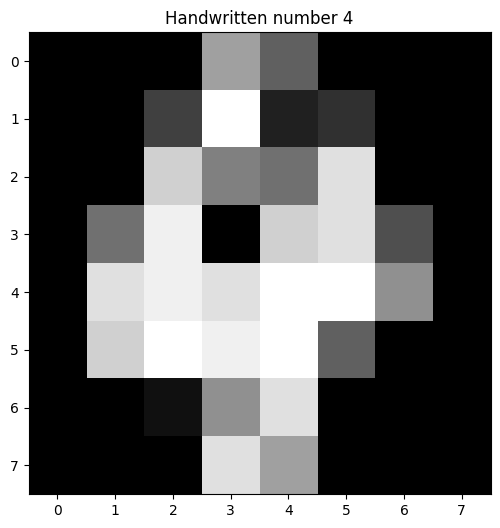

In [29]:
# select random number
random_number = np.random.randint(0, digits.data.shape[0])

# acces the random row
random_row = digits.data[random_number]

# plot the random row

plt.figure(figsize=(8,6))
plt.title(f'Handwritten number {digits.target[random_number]}')
plt.imshow(random_row.reshape(8,8), cmap='gray')


### Plotting every number on a subplot

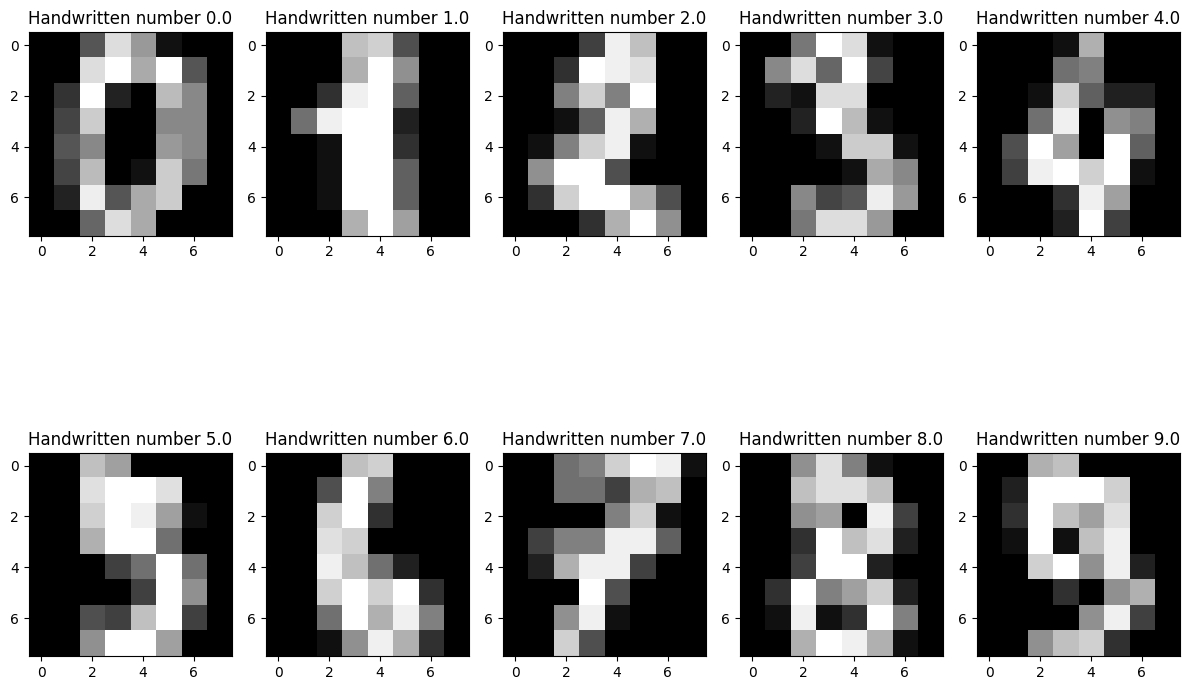

In [ ]:
def pick_number(number: int) -> pd.DataFrame:
    # select the rows that have the target number
    number_df = df_digits[df_digits['target'] == number]
    # pick the first occurence
    number_df = number_df.iloc[0]

    return number_df

def plot_number(number_df: pd.DataFrame, ax: plt.Axes = None):
    ax.set_title(f'Handwritten number {number_df["target"]}')
    ax.imshow(number_df.drop('target').values.reshape(8,8), cmap='gray')


fig, ax = plt.subplots(2, 5, figsize=(12,10))
ax = ax.flatten()

for i in range(10):
    number_df = pick_number(i)
    plot_number(number_df, ax[i])

plt.tight_layout()


# Preprocessing and Splitting the Data into a Train-, and Test-Set

In [33]:
# reshaping it into 1D
data = np.reshape(digits.data, (digits.data.shape[0], -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [35]:
# test train split

x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Training a Support Vector Machine

In [37]:
# initialize the model
svm = LinearSVC(verbose=1, random_state=42)
svm

LinearSVC(random_state=42, verbose=1)

In [38]:
# train the model
svm.fit(x_train, y_train)

[LibLinear]

LinearSVC(random_state=42, verbose=1)

# Evaluating the Support Vector Machine’s Performance

In [48]:
# get the accuracy
accuracy = svm.score(x_test, y_test)
print(f'Accuracy of the svm model : {round(accuracy*100, 3)} %')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of the svm model : {round(acc*100, 3)} %')

Accuracy of the svm model : 93.519 %
Accuracy of the svm model : 93.519 %


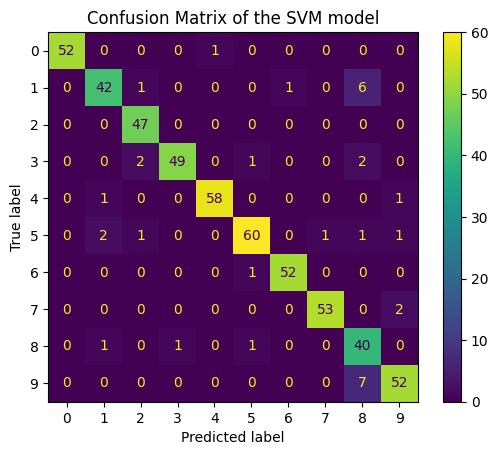

In [51]:
# gettin the confusion matrix
ConfusionMatrixDisplay.from_estimator(
    svm, x_test, y_test)
plt.title('Confusion Matrix of the SVM model')
plt.show()

# Recall and Summarize

You reached the end of our short guided tutorial into the world of supervised learning. In your own words, give an overview of the tasks you completed up to now in the cell below and include:

1. a description of the task you were asked to perform

This laboratory focused on image classification. We used MNIST which contains thousands of handwritten numbers, and tried to recognize them using Linear SVC. We did this in steps : 

- firstly we imported dataset using sklearn's function load_dataset()

- we reshaped the data from  being two-dimensional to one diemsional 

- we split data into training and testing set, to train our model on training set and the check its  perfomrance on testing set

- we trained Linear SVC classifier and then evaluate his performance

- plot the consufion matrix

2. the idea behind the classifier (LinearSVC) you used (no details about the functionality are needed)
    
    Linear SVC is a classifier based on Support Vector Machines, which are used for classification and regression analysis. The classifier works by finding the optimal hyperplane that separates classes with the largest possible margin while allowing for some misclassifications. The key idea is to maximize the margin -the distance between the decision boundary and the closest points from each class, while minimizing errors using a hinge loss function.

    LinearSVC works well if the data is linearly separable, and if its not, the classifier still works fine by introducing the penalty for missclassified points. 


3. an interpretation of the results of your evaluation
    
    Overall the LinearSVC got really good results. The accuracy reached 92%, which is very high.
    The most errors comes from recognizing the 9 as the number 8 (7 errors) and recognizing 1 as 8 (6 errors). Except of that the most common errors are : 7 as 9, 3 as 8 and 5 as 1 (2 times each). After all we could say that the model made a good job, but there is probably still place for impovement. 

    At the first plot in this notebook we can see the handwritten number 4, and with that quality of images even I could misrecognize the numbers, cause it looks similar to 9 :)